In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
timezandmeanz_df = pd.read_csv(r'C:/Users/douge/Python Notebooks/Transport Data/travel time x means of transit.csv')

In [3]:
timezandmeanz_df.loc[timezandmeanz_df['RESIDENCE']=='Alaska']

,RESIDENCE,Travel Time 12,Means of Transportation 11,Output,Workers 16 and Over
264,Alaska,All workers,"Total, means of transportation",Estimate,"359,975"
265,Alaska,All workers,"Total, means of transportation",Margin of Error,"1,986"
266,Alaska,All workers,"Car, truck, or van -- Drove alone",Estimate,"245,255"
267,Alaska,All workers,"Car, truck, or van -- Drove alone",Margin of Error,"2,447"
268,Alaska,All workers,"Car, truck, or van -- In a 2-person carpool",Estimate,"34,815"
...,...,...,...,...,...
523,Alaska,Worked at home,Walked,Margin of Error,0
524,Alaska,Worked at home,"Taxicab, motorcycle or other method",Estimate,0
525,Alaska,Worked at home,"Taxicab, motorcycle or other method",Margin of Error,0
526,Alaska,Worked at home,Worked at home,Estimate,"16,575"


In [4]:
timezandmeanz_df.head(10)

,RESIDENCE,Travel Time 12,Means of Transportation 11,Output,Workers 16 and Over
0,Alabama,All workers,"Total, means of transportation",Estimate,"2,014,825"
1,Alabama,All workers,"Total, means of transportation",Margin of Error,"7,406"
2,Alabama,All workers,"Car, truck, or van -- Drove alone",Estimate,"1,727,280"
3,Alabama,All workers,"Car, truck, or van -- Drove alone",Margin of Error,"6,654"
4,Alabama,All workers,"Car, truck, or van -- In a 2-person carpool",Estimate,"138,265"
5,Alabama,All workers,"Car, truck, or van -- In a 2-person carpool",Margin of Error,"3,164"
6,Alabama,All workers,"Car, truck, or van -- In a 3-or-more person ca...",Estimate,"38,275"
7,Alabama,All workers,"Car, truck, or van -- In a 3-or-more person ca...",Margin of Error,"1,612"
8,Alabama,All workers,Bus or trolley bus,Estimate,"7,315"
9,Alabama,All workers,Bus or trolley bus,Margin of Error,537


In [5]:
#cleaning up column names and dropping unwanted data
timezandmeanz_df.drop(timezandmeanz_df.loc[timezandmeanz_df['Output']=='Margin of Error'].index, inplace=True)

timezandmeanz_df.rename(columns={'Travel Time 12':'Travel Time','Means of Transportation 11':'Means of Transit','Workers 16 and Over':'Workers'},inplace=True)

timezandmeanz_df.drop(['Output'],axis=1,inplace=True)

timezandmeanz_df.reset_index(inplace=True)

In [6]:
timezandmeanz_df.drop(['index'],axis=1,inplace=True)

In [7]:
timezandmeanz_df.drop(timezandmeanz_df.loc[timezandmeanz_df['Travel Time']=='All workers'].index, inplace=True)
timezandmeanz_df.drop(timezandmeanz_df.loc[timezandmeanz_df['Travel Time']=='Did not work at home:'].index, inplace=True)
timezandmeanz_df.drop(timezandmeanz_df.loc[timezandmeanz_df['Means of Transit']=='Total, means of transportation'].index, inplace=True)
timezandmeanz_df.drop(timezandmeanz_df.loc[timezandmeanz_df['Means of Transit']=='Worked at home'].index, inplace=True)

In [8]:
bama_pivot = pd.pivot_table(timezandmeanz_df.loc[timezandmeanz_df['RESIDENCE']=='Alabama'],'Workers','Means of Transit','Travel Time',aggfunc='sum')

In [9]:
timezandmeanz_df.head()

,RESIDENCE,Travel Time,Means of Transit,Workers
23,Alabama,Less than 5 minutes,"Car, truck, or van -- Drove alone","40,330"
24,Alabama,Less than 5 minutes,"Car, truck, or van -- In a 2-person carpool","2,670"
25,Alabama,Less than 5 minutes,"Car, truck, or van -- In a 3-or-more person ca...",735
26,Alabama,Less than 5 minutes,Bus or trolley bus,280
27,Alabama,Less than 5 minutes,"Streetcar, trolley car, subway, or elevated",15


In [34]:
#convert to int64
timezandmeanz_df['Workers'] = timezandmeanz_df['Workers'].fillna(0)
timezandmeanz_df['Workers'].replace(to_replace=',', value='', inplace=True,regex=True)
timezandmeanz_df['Workers'] = timezandmeanz_df['Workers'].astype('int64')

In [35]:
timezandmeanz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4684 entries, 0 to 4683
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   RESIDENCE         4682 non-null   object
 1   Travel Time       4681 non-null   object
 2   Means of Transit  4681 non-null   object
 3   Workers           4684 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 146.5+ KB


In [11]:
dangit=pd.DataFrame([['Alabama','Worked at home','Worked at home','58,985']],columns=['RESIDENCE','Travel Time','Means of Transit','Workers'])

In [12]:
dangit

,RESIDENCE,Travel Time,Means of Transit,Workers
0,Alabama,Worked at home,Worked at home,"58,985"


In [13]:
timezandmeanz_df = timezandmeanz_df.append(dangit, ignore_index=True)

In [14]:
bama_pivot

Travel Time,15 to19 minutes,20 to 29 minutes,30 to 44 minutes,45 to 59 minutes,5 to 14 minutes,60 to 74 minutes,75 to 89 minutes,90 minutes or more,Less than 5 minutes,Worked at home
Means of Transit,,,,,,,,,,
Bicycle,425,280,495,30,910,115,0,10,40,0
Bus or trolley bus,855,835,"1,600",665,"1,000",905,220,955,280,0
"Car, truck, or van -- Drove alone","298,485","395,720","355,700","126,610","415,380","57,775","9,485","27,795","40,330",0
"Car, truck, or van -- In a 2-person carpool","21,490","29,455","29,920","12,930","29,245","7,930","1,065","3,565","2,670",0
"Car, truck, or van -- In a 3-or-more person carpool","6,060","6,565","7,840","4,075","7,295","3,170",560,"1,980",735,0
Railroad or ferryboat,20,140,40,20,75,25,0,0,15,0
"Streetcar, trolley car, subway, or elevated",0,25,60,15,10,25,0,40,15,0
"Taxicab, motorcycle or other method","2,565","2,500","3,315",970,"5,265",915,55,"1,795","1,490",0
Walked,"2,685","1,530",930,210,"9,890",230,10,260,"7,265",0


In [68]:
# rearranging columns....
orderedtimes = ['Less than 5 minutes',
                '5 to 14 minutes',
                '15 to19 minutes',
                '20 to 29 minutes',
                '30 to 44 minutes',
                '45 to 59 minutes',
                '60 to 74 minutes',
                '75 to 89 minutes',
                '90 minutes or more',]
               
                

In [16]:
bama_pivot = bama_pivot.fillna(0)
bama_pivot = bama_pivot.reindex(columns=orderedtimes,copy=False)

In [25]:
bama_pivot.drop(['Worked from home'],axis=1,inplace=True)

In [26]:
bama_pivot.describe()

Travel Time,Less than 5 minutes,5 to 14 minutes,15 to19 minutes,20 to 29 minutes,30 to 44 minutes,45 to 59 minutes,60 to 74 minutes,75 to 89 minutes,90 minutes or more
count,9,9,9,9,9,9,9,9,9
unique,8,9,9,9,9,9,8,7,9
top,15,"1,000",425,280,"7,840",20,25,0,0
freq,2,1,1,1,1,1,2,3,1


In [27]:
#convert to int64
bama_pivot.replace(to_replace=',', value='', inplace=True,regex=True)
bama_pivot = bama_pivot.astype('int64')

In [28]:
bama_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Bicycle to Walked
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Less than 5 minutes  9 non-null      int64
 1   5 to 14 minutes      9 non-null      int64
 2   15 to19 minutes      9 non-null      int64
 3   20 to 29 minutes     9 non-null      int64
 4   30 to 44 minutes     9 non-null      int64
 5   45 to 59 minutes     9 non-null      int64
 6   60 to 74 minutes     9 non-null      int64
 7   75 to 89 minutes     9 non-null      int64
 8   90 minutes or more   9 non-null      int64
dtypes: int64(9)
memory usage: 1.0+ KB


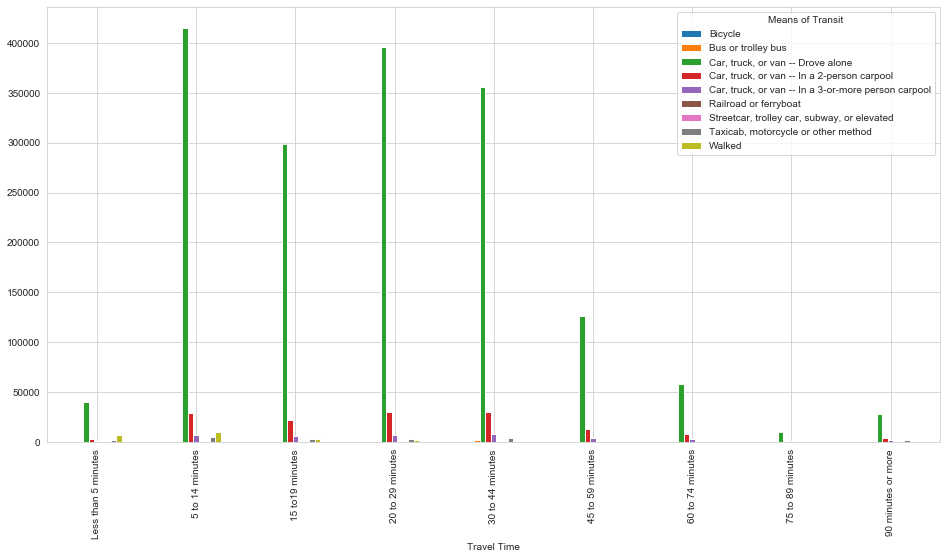

In [29]:
bama_pivot.swapaxes('columns','rows').plot(kind='bar',figsize=(16,8))

In [47]:
maxcommuters_pivot = pd.pivot_table(timezandmeanz_df,'Workers','RESIDENCE','Travel Time',aggfunc='sum')

In [48]:
maxcommuters_pivotwmarg = pd.pivot_table(timezandmeanz_df,'Workers','RESIDENCE','Travel Time',margins=True,aggfunc='sum')

In [49]:
maxcommuters_pivotwmarg

Travel Time,15 to19 minutes,20 to 29 minutes,30 to 44 minutes,45 to 59 minutes,5 to 14 minutes,60 to 74 minutes,75 to 89 minutes,90 minutes or more,Less than 5 minutes,Worked at home,All
RESIDENCE,,,,,,,,,,,
Alabama,332585,437050,399900,145525,469070,71090,11395,36400,52840,58985,2014840
Alaska,66080,60860,31675,10769,129204,8770,1173,6620,28264,0,343415
Arizona,414405,607360,587455,208570,624295,104575,12795,47545,73760,0,2680760
Arkansas,211925,237530,193620,68160,380150,33940,6380,20745,56015,0,1208465
California,2454825,3318845,3542205,1389330,3400045,1090675,167410,583650,310870,0,16257855
Colorado,392460,546980,515565,187430,598370,103680,15255,49165,76365,0,2485270
Connecticut,267875,370645,320015,113760,417780,77245,16050,51530,45460,0,1680360
Delaware,68319,96170,81960,28975,95980,18204,3545,10799,9675,0,413627
District of Columbia,40020,75710,102680,37815,38375,19965,2265,6530,4340,0,327700


Text(0, 0.5, 'Number of Commuters')

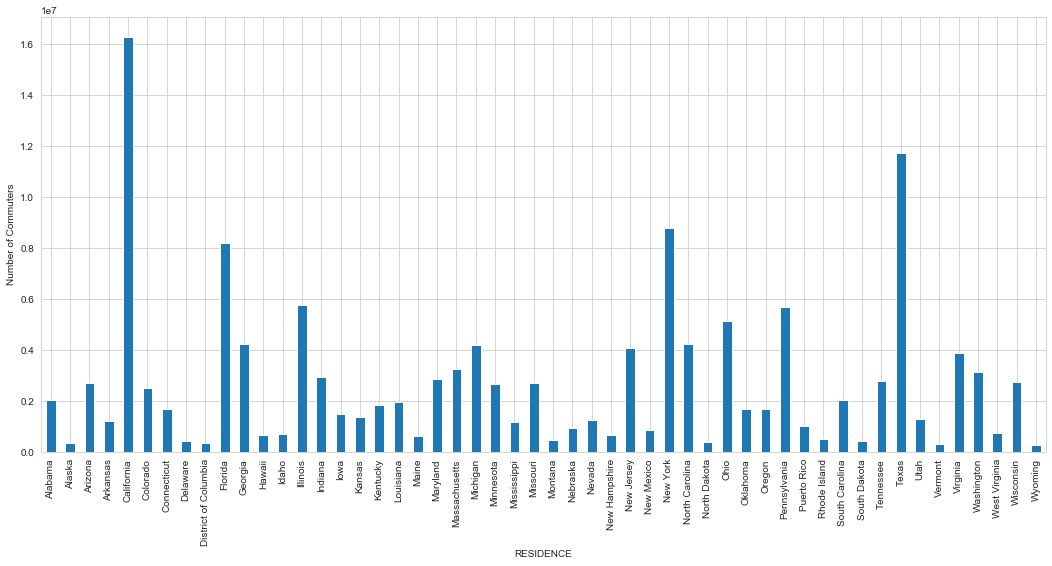

In [62]:
#greatest number of commuters by state
maxcommuters_pivotwmarg['All'][:-1].plot(kind='bar',figsize=(18,8))
plt.ylabel('Number of Commuters')

In [66]:
maxcommuters_pivot.drop(['Worked from home'],inplace=True,axis=1)

In [67]:
maxcommuters_pivot.head()

Travel Time,Less than 5 minutes,5 to 14 minutes,15 to19 minutes,20 to 29 minutes,30 to 44 minutes,45 to 59 minutes,60 to 74 minutes,75 to 89 minutes,90 minutes or more
RESIDENCE,,,,,,,,,
Alabama,52840,469070,332585,437050,399900,145525,71090,11395,36400
Alaska,28264,129204,66080,60860,31675,10769,8770,1173,6620
Arizona,73760,624295,414405,607360,587455,208570,104575,12795,47545
Arkansas,56015,380150,211925,237530,193620,68160,33940,6380,20745
California,310870,3400045,2454825,3318845,3542205,1389330,1090675,167410,583650


In [64]:
maxcommuters_pivot = maxcommuters_pivot.reindex(columns=orderedtimes,copy=False)

In [ ]:
maxcommuters_pivotwmarg['All'][:-1].plot(kind='bar',figsize=(18,8))
plt.ylabel('Number of Commuters')

In [69]:
maxcommuters_pivotwmarg = maxcommuters_pivotwmarg.reindex(columns=orderedtimes,copy=False)

In [73]:
swappedmax = maxcommuters_pivotwmarg.swapaxes('columns','rows')

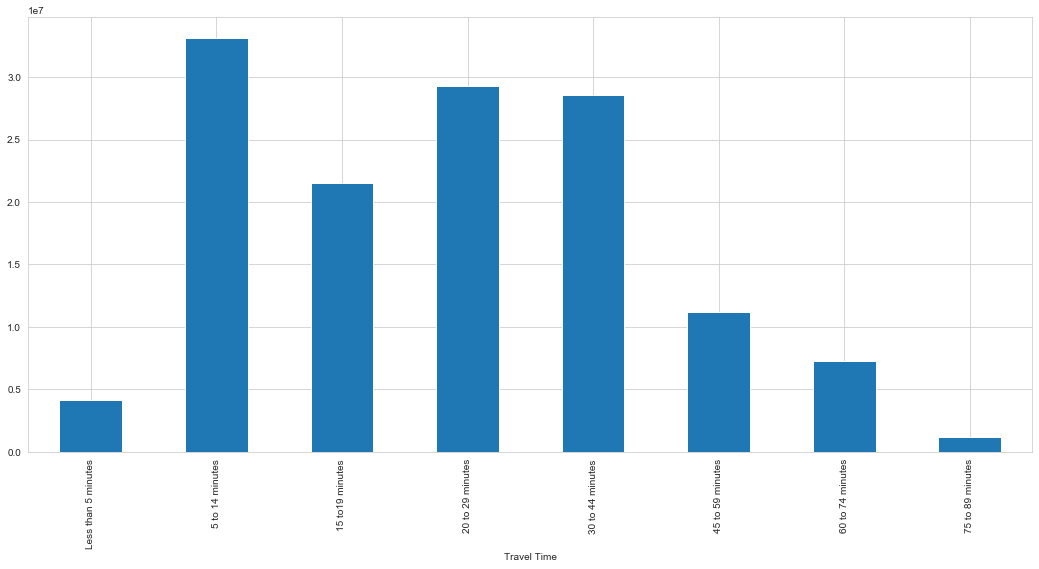

In [78]:
#most common commute time
swappedmax['All'][:-1].plot(kind='bar',figsize=(18,8))

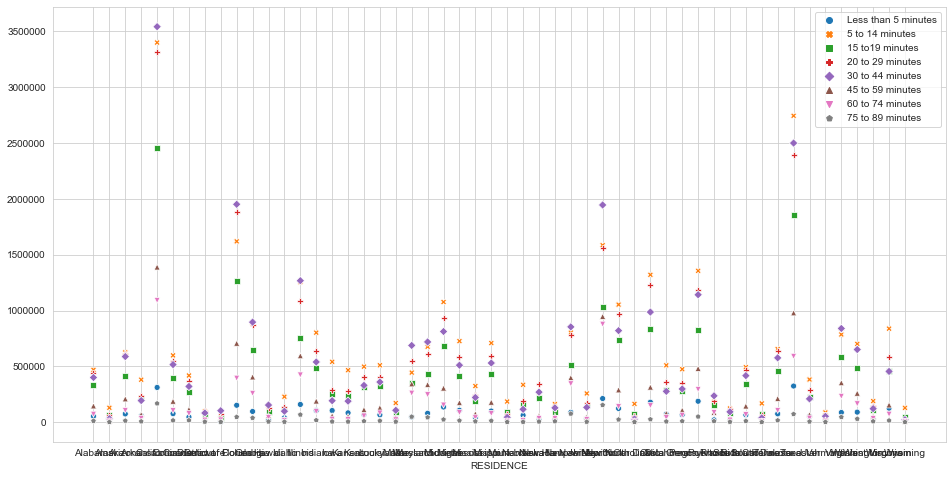

In [153]:
#couldn't figure out how to verticalize the xaxis labels, since you can't seem to pass text kwargs using the plt() method
plt.figure(figsize=(16, 8))
sns.scatterplot(data=maxcommuters_pivot[['Less than 5 minutes','5 to 14 minutes',
                '15 to19 minutes',
                '20 to 29 minutes',
                '30 to 44 minutes',
                '45 to 59 minutes',
                '60 to 74 minutes',
                '75 to 89 minutes']])

In [159]:
timesxmeans_pivot = pd.pivot_table(timezandmeanz_df,'Workers','Means of Transit','Travel Time',aggfunc='sum')

In [162]:
timesxmeans_pivot = timesxmeans_pivot.fillna(0)

In [164]:
timesxmeans_pivot = timesxmeans_pivot.reindex(columns=orderedtimes,copy=False)

In [165]:
timesxmeans_pivot

Travel Time,Less than 5 minutes,5 to 14 minutes,15 to19 minutes,20 to 29 minutes,30 to 44 minutes,45 to 59 minutes,60 to 74 minutes,75 to 89 minutes,90 minutes or more
Means of Transit,,,,,,,,,
Bicycle,30395.0,293450.0,166225.0,177060.0,139565.0,37739.0,23203.0,2785.0,8998.0
Bus or trolley bus,22500.0,211275.0,252895.0,506850.0,981810.0,553180.0,696045.0,98350.0,461745.0
"Car, truck, or van -- Drove alone",2848000.0,27312940.0,18184250.0,24855430.0,23000485.0,8467570.0,4721855.0,737845.0,2143745.0
"Car, truck, or van -- In a 2-person carpool",221155.0,2438210.0,1630405.0,2162285.0,2212420.0,878680.0,567570.0,86555.0,284560.0
"Car, truck, or van -- In a 3-or-more person carpool",61150.0,599630.0,405205.0,574455.0,713805.0,331950.0,289685.0,45310.0,175025.0
Railroad or ferryboat,3721.0,6468.0,7166.0,24645.0,102077.0,132496.0,250540.0,94211.0,270028.0
"Streetcar, trolley car, subway, or elevated",5226.0,28262.0,72452.0,290138.0,873949.0,627211.0,598415.0,93889.0,233701.0
"Taxicab, motorcycle or other method",128270.0,453285.0,266335.0,293260.0,286230.0,97450.0,96895.0,12788.0,160110.0
Walked,863395.0,1823075.0,557815.0,435300.0,267060.0,54435.0,36735.0,4530.0,21859.0


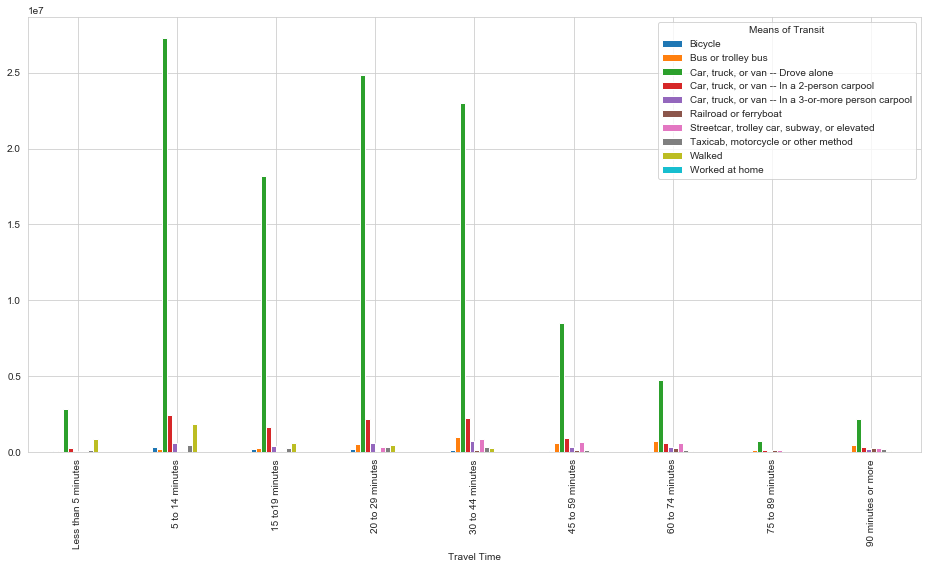

In [169]:
timesxmeans_pivot.swapaxes('columns','rows').plot(kind='bar',figsize=(16,8))